This is a messy draft notebook for analysis of spike inference and is gonna be more organized.

In [1]:
%matplotlib qt

In [20]:
import numpy as np
import nest
import scipy as sp
import matplotlib.pyplot as plt
import scipy.signal as sig

In [21]:
sp.__version__

'1.9.3'

In [22]:
spikes = np.load("spikes-10e4-ms.npy")

In [23]:
np.shape(spikes)

(1250, 10000)

In [24]:
N = np.shape(spikes)[0]
wup_time = 10
spikes = spikes[:, wup_time:]
sim_dur = np.shape(spikes)[1]
calcium = np.zeros((N, sim_dur))
tau = 100
dt = 1
const_A = np.exp((-1/tau)*dt)

calcium[:, 0] = spikes[:, 0]

for t in range(1, sim_dur):
    #calcium[:, t] = np.dot(const_A, calcium[:, t-1]) + spikes[:, t]
    calcium[:, t] = const_A*calcium[:, t-1] + spikes[:, t]
    
#there is no need for convolutional for loops!

In [25]:
cal_test = calcium[500, :]

plt.figure(1)
plt.suptitle('Ground Truth')
plt.subplot(2,1,1)
plt.title('Calcium-tau = 10ms')
plt.plot(cal_test)
plt.subplot(2,1,2)
plt.title('spike trains')
plt.plot(spikes[500, :])



In [26]:
x = np. zeros(sim_dur)
x[0] = 0.0
ntau = 100
nconst_A = np.exp((-1/ntau)*dt)

for i in range(0, sim_dur-1):
    x[i+1] = calcium[500, i+1] - nconst_A*calcium[500, i]

In [27]:
plt.figure(2)
plt.plot(x)
plt.title('Deconvolution of spike trains from Calcium, measured tau=50ms')

Text(0.5, 1.0, 'Deconvolution of spike trains from Calcium, measured tau=50ms')

In [ ]:
plt.figure(3)
plt.hist(x, bins = 100)

In [429]:
x

array([ 0.00000000e+00, -7.53612553e-02,  9.31810316e-01, ...,
       -2.24148649e-10, -2.02818085e-10, -1.83517392e-10])

In [426]:
np.size(x)

9990

In [674]:
np. corrcoef(x, spikes[500, :])

array([[1.        , 0.96191197],
       [0.96191197, 1.        ]])

Text(0.5, 0, 'log of delta tau')

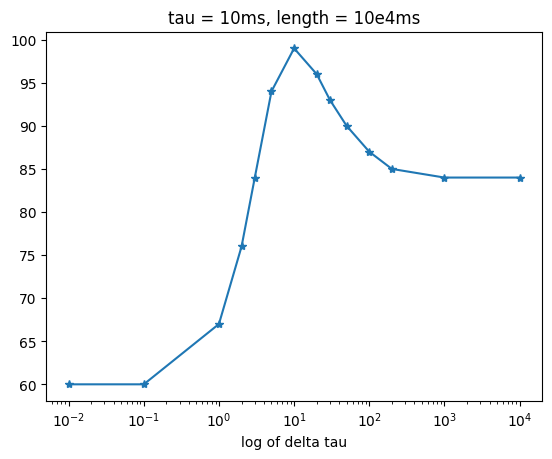

In [382]:
# 10e4, tau = 10
measureedTau = np.array([0.01, 0.1, 1, 2, 3, 5, 10, 20, 30, 50, 100, 200, 1000, 10000])

correlations = np.array([60, 60, 67, 76, 84, 94, 99, 96, 93, 90, 87, 85, 84, 84])
plt.plot(measureedTau, correlations, "*-")
plt.xscale('log')
plt.title('tau = 10ms, length = 10e4ms')
plt.xlabel('log of delta tau')

Text(0.5, 0, 'log of delta tau')

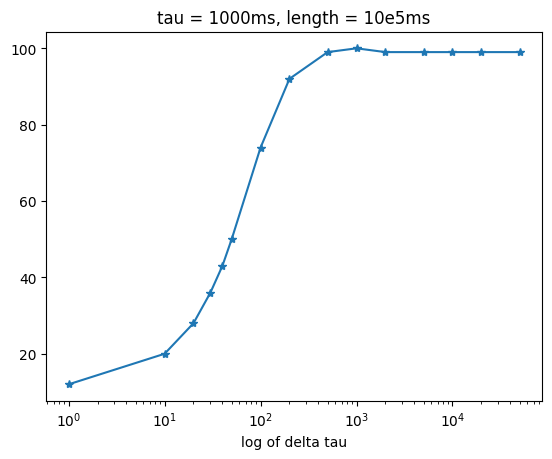

In [383]:
# 10e5, tau = 1000
mT = np.array([1, 10, 20, 30, 40, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000])
corel = np.array([12, 20, 28, 36, 43, 50, 74, 92, 99, 99.99, 99, 99, 99, 99, 99])

plt.plot(mT, corel, "*-")
plt.xscale('log')
plt.title('tau = 1000ms, length = 10e5ms')
plt.xlabel('log of delta tau')

Text(0.5, 0, 'log of delta tau')

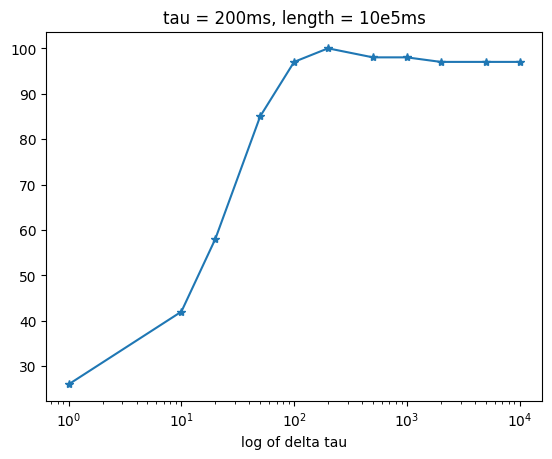

In [384]:
# 10e5, tau = 200
mT = np.array([1, 10, 20, 50, 100, 200, 500, 1000,2000, 5000, 10000])
corel = np.array([26, 42, 58, 85, 97, 99.99, 98, 98, 97, 97, 97])
plt.plot(mT, corel, "*-")
plt.xscale('log')
plt.title('tau = 200ms, length = 10e5ms')
plt.xlabel('log of delta tau')

Text(0.5, 0, 'log of delta tau')

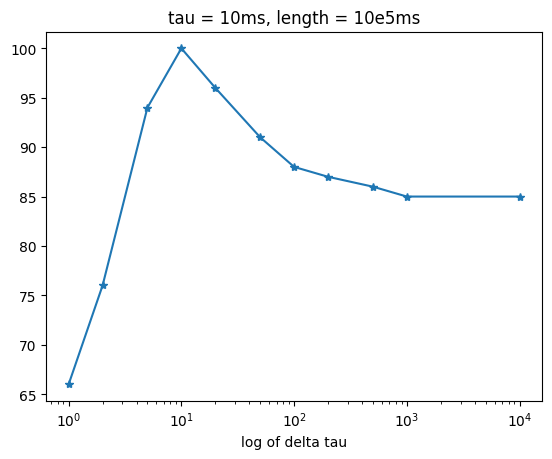

In [385]:
# 10e5, tau = 10
mT = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 10000])
corel = np.array([66, 76, 94, 100, 96, 91, 88, 87, 86, 85, 85])

plt.plot(mT, corel, "*-")
plt.xscale('log')
plt.title('tau = 10ms, length = 10e5ms')
plt.xlabel('log of delta tau')

In [401]:
from scipy import signal

cross_corr = signal.correlate(x, spikes[500, :])

plt.plot(cross_corr)

/home/joudy/.local/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning:Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


### Noise Analysis

In [3]:
spikes = np.load("spikes-10e4-ms.npy")

N = np.shape(spikes)[0]
wup_time = 1000
spikes = spikes[:, wup_time:]
sim_dur = np.shape(spikes)[1]
calcium = np.zeros((N, sim_dur))
tau = 100
dt = 1
const_A = np.exp((-1/tau)*dt)

calcium[:, 0] = spikes[:, 0]

for t in range(1, sim_dur):
    #calcium[:, t] = np.dot(const_A, calcium[:, t-1]) + spikes[:, t]
    calcium[:, t] = const_A*calcium[:, t-1] + spikes[:, t]
    
#there is no need for convolutional for loops!

In [4]:
n = 500
calciumN = calcium[n, :]
ss = np.size(calciumN)

In [5]:
noise = np.random.normal(0,1, ss)
cn = calciumN + noise

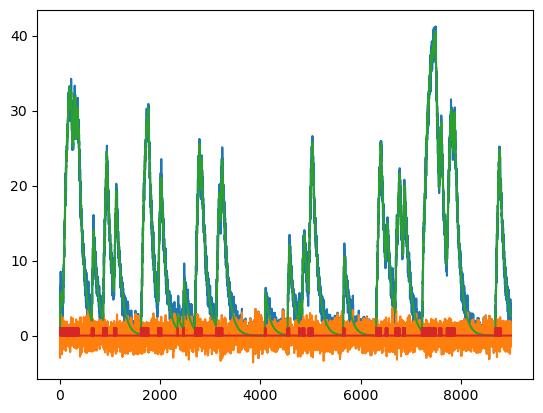

In [6]:
plt.plot(cn)
plt.plot(noise)
plt.plot(calciumN)
plt.plot(spikes[500, :])


##### savitzky with derivative

In [7]:
smooth_cal = sig.savgol_filter(cn, window_length=51, deriv=0, delta=1., polyorder=5)

In [8]:
smooth_deriv = sig.savgol_filter(cn, window_length=51, deriv=1, delta=1., polyorder=5)

In [16]:
x = np. zeros(sim_dur)
x[0] = 0.0

ntau = 1
dt = 1
nconst_A = np.exp((-1/ntau)*dt)

for i in range(0, sim_dur-1):
    x[i+1] = smooth_deriv[i+1] - nconst_A*smooth_cal[i]
    #x[i+1] = cn[i+1] - const_A*cn[i]
 


In [19]:
%matplotlib qt
plt.plot(x)
plt.plot(cn)
plt.plot(-x)

plt.grid()

In [18]:
y = np. zeros(sim_dur)
y[0] = 0.0

for i in range(0, sim_dur-1):
    y[i+1] = x[i+1] - const_A*x[i]

In [16]:
cc = sig.correlate(-x, calciumN)
lags = sig.correlation_lags(sim_dur, ss)
plt.plot(lags, cc)
plt.grid()

In [19]:
np.corrcoef(spikes[500, :], y)

array([[ 1.        , -0.31481521],
       [-0.31481521,  1.        ]])

In [20]:
plt.plot(x)
plt.plot(cn)
plt.plot(y)

In [661]:
x = np. zeros(sim_dur)
x[0] = 0.0

for i in range(0, sim_dur-1):
    x[i+1] = cn[i+1] - const_A*cn[i]

In [662]:
plt.plot(x)

In [4]:
np. corrcoef(-x, spikes[500, :])

NameError: name 'x' is not defined

In [693]:
sig.cor(-x, calciumN)

array([[1.        , 0.99933257],
       [0.99933257, 1.        ]])

In [708]:
cc

array([5.42106118e+00, 4.92819217e+00, 6.39550860e+00, ...,
       5.49006263e+00, 2.75257969e+00, 1.05963813e-10])

In [703]:
cc[cc == min(cc)]

array([1.05963813e-10])

In [710]:
sim_dur

9000

In [3]:
sp.__version__

'1.1.0'